In [103]:
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline

In [104]:
cnxn_string = "postgresql+psycopg2://{user}:{pswd}" "@{host}:{port}/{database}"
print(cnxn_string)

postgresql+psycopg2://{user}:{pswd}@{host}:{port}/{database}


In [105]:
engine = create_engine(
    cnxn_string.format(
        user="postgres",
        pswd="Phoenix03$",
        host="localhost",
        port="5432",
        database="world",
    )
)

In [106]:
# Test the connection by reading two rows from the country table
df = pd.read_sql_query("SELECT * FROM country LIMIT 2", engine)
df

,code,name,continent,region,surfacearea,indepyear,population,lifeexpectancy,gnp,gnpold,localname,governmentform,headofstate,capital,code2
0,ABW,Aruba ...,North\nAmerica ...,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan\nTerritory of The Netherlands,Beatrix ...,129,AW
1,AFG,Afghanistan ...,Asia ...,Southern and Central\nAsia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic\nEmirate,Mohammad Omar ...,1,AF


In [107]:
conn = engine.connect()

In [108]:
query = """
SELECT country.name AS country,
       COUNT(countrylanguage.language) AS number_of_languages
FROM country
JOIN countrylanguage
  ON country.code = countrylanguage.countrycode
WHERE countrylanguage.isofficial = 'T'
GROUP BY country.name
HAVING COUNT(*) > 2
ORDER BY number_of_languages DESC;
"""

df = pd.read_sql(query, engine)
df

,country,number_of_languages
0,Switzerland ...,4
1,South Africa ...,4
2,Vanuatu ...,3
3,Belgium ...,3
4,Luxembourg ...,3
5,Peru ...,3
6,Bolivia ...,3
7,Singapore ...,3


In [109]:
import matplotlib.pyplot as plt
import numpy as np

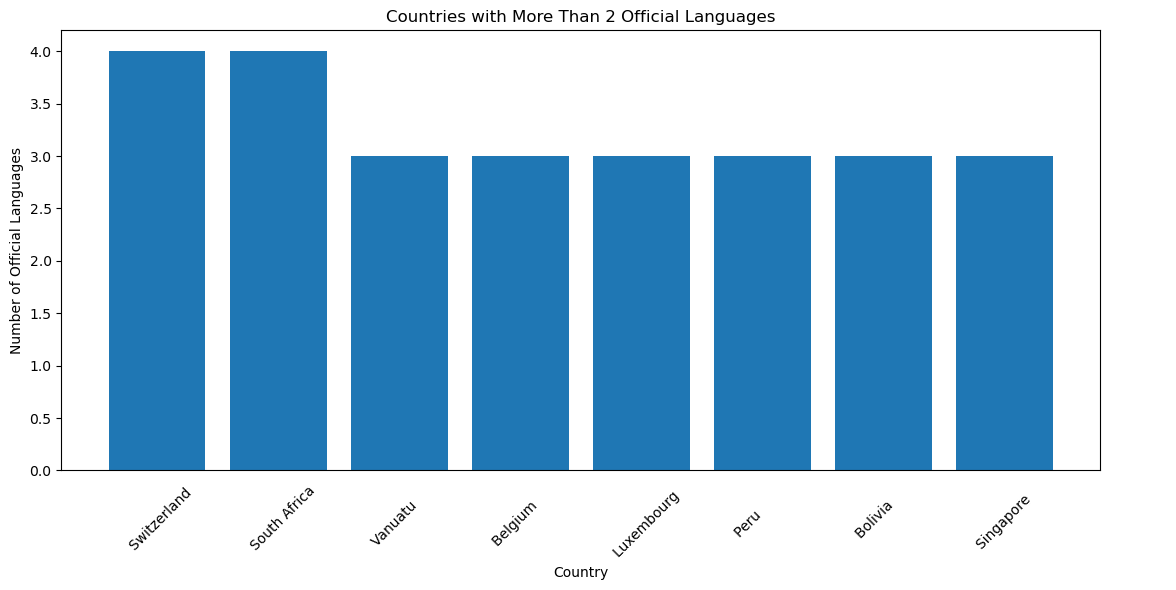

In [110]:
x = np.arange(len(df["country"]))

plt.figure(figsize=(12, 6))
plt.bar(x, df["number_of_languages"])

plt.title("Countries with More Than 2 Official Languages")
plt.xlabel("Country")
plt.ylabel("Number of Official Languages")
plt.xticks(x - 0.25, df["country"], rotation=45, ha="left")
plt.gca().tick_params(axis="x", length=0, pad=-80)
plt.tight_layout()
plt.show()